<a href="https://colab.research.google.com/github/KimTaesong/AI_project/blob/master/10_Lstm(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
np.random.seed(10)

# 데이터셋 생성
# 사전을 이용해서 순차적인 음표를 우리가 지정한 윈도우 크기만큼 잘라 데이터셋을 생성하는 함수
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6 ,'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',7 :'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}


def seq2dataset(seq , window_size):
  dataset = []
  for i in range(len(seq) - window_size):
    subset = seq [i :(i+window_size+1)]
    dataset.append([code2idx[item] for item in subset])
  return np.array (dataset)


# 시퀀스 데이터 정의
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
  'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
  'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
  'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

dataset = seq2dataset(seq , window_size = 4)
print(dataset.shape)
print(dataset)

x_train = dataset[:,0:4]
y_train = dataset[:,4]
print(x_train)
print(y_train)
x_train = x_train / 13.0
print(x_train)
print(y_train)
y_train = np_utils.to_categorical(y_train)
print(y_train)


(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]
[[11  9  2 10]
 [ 9  2 10  8]
 [ 2 10  8  1]
 [10  8  1  7]
 [ 8  1  7  8]
 [ 1  7  8  9]
 

In [ ]:

model = Sequential()
model.add( Dense(128, input_dim =4, activation='relu'))
model.add( Dense(128, input_dim =4, activation='relu'))
model.add(Dense(y_train.shape[1], activation= 'softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               640       
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 12)                1548      
Total params: 18,700
Trainable params: 18,700
Non-trainable params: 0
_________________________________________________________________


Epoch 1/1000
50/50 [==============================] - 0s 2ms/step - loss: 2.4836 - accuracy: 0.2400
Epoch 2/1000
50/50 [==============================] - 0s 255us/step - loss: 2.4233 - accuracy: 0.3400
Epoch 3/1000
50/50 [==============================] - 0s 156us/step - loss: 2.3752 - accuracy: 0.3400
Epoch 4/1000
50/50 [==============================] - 0s 106us/step - loss: 2.3277 - accuracy: 0.3400
Epoch 5/1000
50/50 [==============================] - 0s 143us/step - loss: 2.2807 - accuracy: 0.3400
Epoch 6/1000
50/50 [==============================] - 0s 161us/step - loss: 2.2340 - accuracy: 0.3400
Epoch 7/1000
50/50 [==============================] - 0s 163us/step - loss: 2.1938 - accuracy: 0.3400
Epoch 8/1000
50/50 [==============================] - 0s 151us/step - loss: 2.1496 - accuracy: 0.3400
Epoch 9/1000
50/50 [==============================] - 0s 139us/step - loss: 2.1187 - accuracy: 0.3400
Epoch 10/1000
50/50 [==============================] - 0s 145us/step - loss: 2.0789 

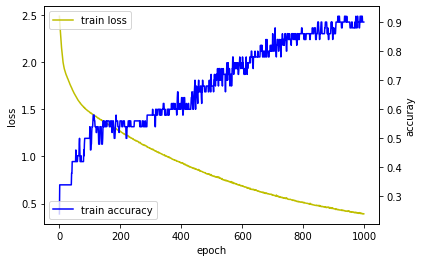

In [ ]:
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=1000)

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')


acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
# 싱글 스텝 prediction
results = model.predict(x_train)

print(results)

code_results = ['g8', 'e8', 'e4', 'f8']
for i in range(len(results)):
  index = np.argmax(results[i])
  code_results.append(idx2code[index])

print('code_results: ', code_results)
print('original: ', seq)

#multi step predictin
code_start = ['g8', 'e8', 'e4', 'f8']
code_in = [code2idx[i] / 13.0 for i in code_start]
print(code_in)

for i in range(len(results)):
  code_in_array = np.array(code_in)
  print(code_in_array)
  sample_in = np.reshape(code_in_array, (1, 4)) #instance num, feature num
  results = model.predict(sample_in)
  index = np.argmax(results)
  code_start.append(idx2code[index])
  code_in.append(index / 13.0)
  code_in.pop(0) # 0번째 리스트를 빼버림
print('code_result2', code_start)

[[0.09030263 0.05873902 0.09903839 0.08210277 0.0777071  0.09441078
  0.06517654 0.09926181 0.07933684 0.08163977 0.09191288 0.0803715 ]
 [0.07861339 0.06349742 0.10807868 0.08178499 0.08387806 0.08321511
  0.06514682 0.09077705 0.08257332 0.08208496 0.08929402 0.09105614]
 [0.0818787  0.0746692  0.09064047 0.08209004 0.08301345 0.08813863
  0.06707425 0.09078757 0.08232212 0.0780783  0.0911857  0.09012155]
 [0.0885442  0.06123965 0.09589384 0.08299696 0.07947347 0.09365512
  0.06752392 0.09657885 0.08022714 0.08112763 0.09150647 0.0812327 ]
 [0.08068415 0.06521937 0.10386369 0.08188795 0.08181232 0.08394976
  0.06735354 0.09156685 0.08418544 0.0820292  0.0883771  0.08907066]
 [0.08572944 0.07489306 0.09703741 0.08153337 0.07902423 0.08415908
  0.06649783 0.09097497 0.08477129 0.07690249 0.09189649 0.08658027]
 [0.08500201 0.06532431 0.10230314 0.08022901 0.08159032 0.08641346
  0.0631602  0.0961055  0.08335113 0.07905553 0.09139056 0.08607481]
 [0.08501276 0.06323984 0.10448314 0.0798

In [ ]:
#mul